In [1]:
import random
import time

import ollama
from tqdm import tqdm

In [2]:
modelfile = """
FROM llama3.1
SYSTEM Sort the input list of numbers in ascending order. The list is comma-separated. Only return the list of numbers, not the input prompt.
"""

ollama.create(model="sortLlama", modelfile=modelfile)

{'status': 'success'}

In [3]:
import re

def sortLlama(list):
    list_str = ",".join([str(i) for i in list])
    response = ollama.chat(
        model="sortLlama",
        messages=[
            {
                "role": "user",
                "content": list_str,
            },
        ],
    )
    list_response = response["message"]["content"]
    list_response = re.sub(r'[^0-9,]', '', list_response)
    return [int(i) for i in list_response.split(",")]

sortLlama([3, 2, 1])

[1, 2, 3]

In [4]:
random_list = [random.randint(1, 100) for _ in range(10)]
sorted_ai_list = sortLlama(random_list)
sorted_list = sorted(random_list)
print("Random List:", random_list)
print("Sorted List (AI):", sorted_ai_list)
print("Sorted List (Py):", sorted_list)

Random List: [5, 65, 53, 80, 83, 1, 4, 95, 71, 6]
Sorted List (AI): [1, 4, 5, 6, 53, 65, 71, 80, 83, 95]
Sorted List (Py): [1, 4, 5, 6, 53, 65, 71, 80, 83, 95]


In [5]:
# Function to measure the time and length of random lists
def measure_time_and_length(n=10, max_value=10):
    # Generate a random list
    random_list = [random.randint(1, max_value) for _ in range(n)]

    # Measure the time taken to generate the list
    start_time = time.time()
    try:
        sorted_ai_list = sortLlama(random_list)
    except Exception as e:
        print("Error:", e)
        sorted_ai_list = []
    end_time = time.time()
    time_taken = end_time - start_time

    sorted_list = sorted(random_list)

    # Get the length of the list
    list_length = len(random_list)
    is_correct = sorted_list == sorted_ai_list

    return time_taken, list_length, is_correct

# Call the function and print the results
all_points = []
for n in tqdm(range(1, 1000, 5)):
    time_taken, list_length, is_correct = measure_time_and_length(n)
    all_points.append((time_taken, list_length, is_correct))

 16%|█▌        | 31/200 [02:23<19:13,  6.82s/it]

Error: invalid literal for int() with base 10: ''


 24%|██▍       | 49/200 [04:36<17:51,  7.10s/it]

Error: invalid literal for int() with base 10: ''


 26%|██▋       | 53/200 [05:07<17:11,  7.01s/it]

Error: invalid literal for int() with base 10: ''


 46%|████▋     | 93/200 [11:09<29:15, 16.41s/it]

Error: invalid literal for int() with base 10: ''


 48%|████▊     | 95/200 [11:27<22:57, 13.12s/it]

Error: invalid literal for int() with base 10: ''


 54%|█████▍    | 108/200 [14:08<20:14, 13.20s/it]

Error: invalid literal for int() with base 10: ''


 58%|█████▊    | 117/200 [15:57<15:57, 11.54s/it]

Error: invalid literal for int() with base 10: ''


 59%|█████▉    | 118/200 [16:05<14:22, 10.52s/it]

Error: invalid literal for int() with base 10: ''


 64%|██████▍   | 129/200 [17:58<11:11,  9.46s/it]

Error: invalid literal for int() with base 10: ''


 67%|██████▋   | 134/200 [18:48<11:39, 10.60s/it]

Error: invalid literal for int() with base 10: ''


 68%|██████▊   | 137/200 [19:12<09:12,  8.77s/it]

Error: invalid literal for int() with base 10: ''


 69%|██████▉   | 138/200 [19:37<14:02, 13.59s/it]

Error: invalid literal for int() with base 10: ''


 72%|███████▏  | 143/200 [20:31<10:29, 11.05s/it]

Error: invalid literal for int() with base 10: ''


 76%|███████▌  | 152/200 [22:25<10:20, 12.93s/it]

Error: invalid literal for int() with base 10: ''


 80%|███████▉  | 159/200 [23:37<07:42, 11.28s/it]

Error: invalid literal for int() with base 10: ''


 82%|████████▏ | 164/200 [25:19<09:42, 16.17s/it]

Error: invalid literal for int() with base 10: ''


 84%|████████▎ | 167/200 [25:50<06:43, 12.23s/it]

Error: invalid literal for int() with base 10: ''


 84%|████████▍ | 169/200 [26:19<06:56, 13.44s/it]

Error: invalid literal for int() with base 10: ''


 86%|████████▋ | 173/200 [27:02<05:26, 12.10s/it]

Error: invalid literal for int() with base 10: ''


 87%|████████▋ | 174/200 [27:15<05:19, 12.28s/it]

Error: invalid literal for int() with base 10: ''


 92%|█████████▎| 185/200 [29:11<02:30, 10.02s/it]

Error: invalid literal for int() with base 10: ''


 98%|█████████▊| 195/200 [30:53<00:56, 11.30s/it]

Error: invalid literal for int() with base 10: ''


100%|██████████| 200/200 [32:10<00:00,  9.65s/it]


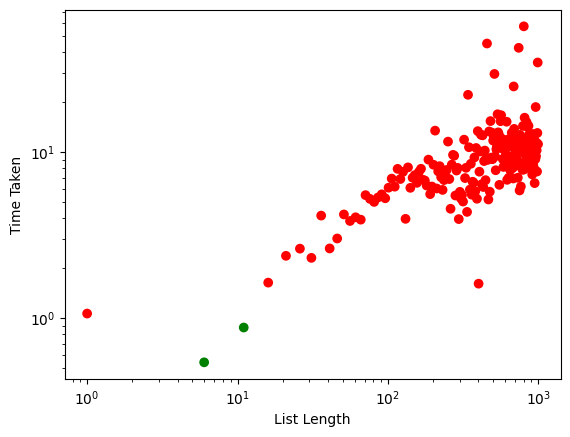

In [6]:
import matplotlib.pyplot as plt

# Extract the x, y, and color values from all_points
all_times = [point[0] for point in all_points]
all_lengths = [point[1] for point in all_points]
color = ['green' if point[2] else 'red' for point in all_points]

# Create the scatter plot
plt.scatter(all_lengths, all_times, c=color)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('List Length')
plt.ylabel('Time Taken')

# Show the plot
plt.show()

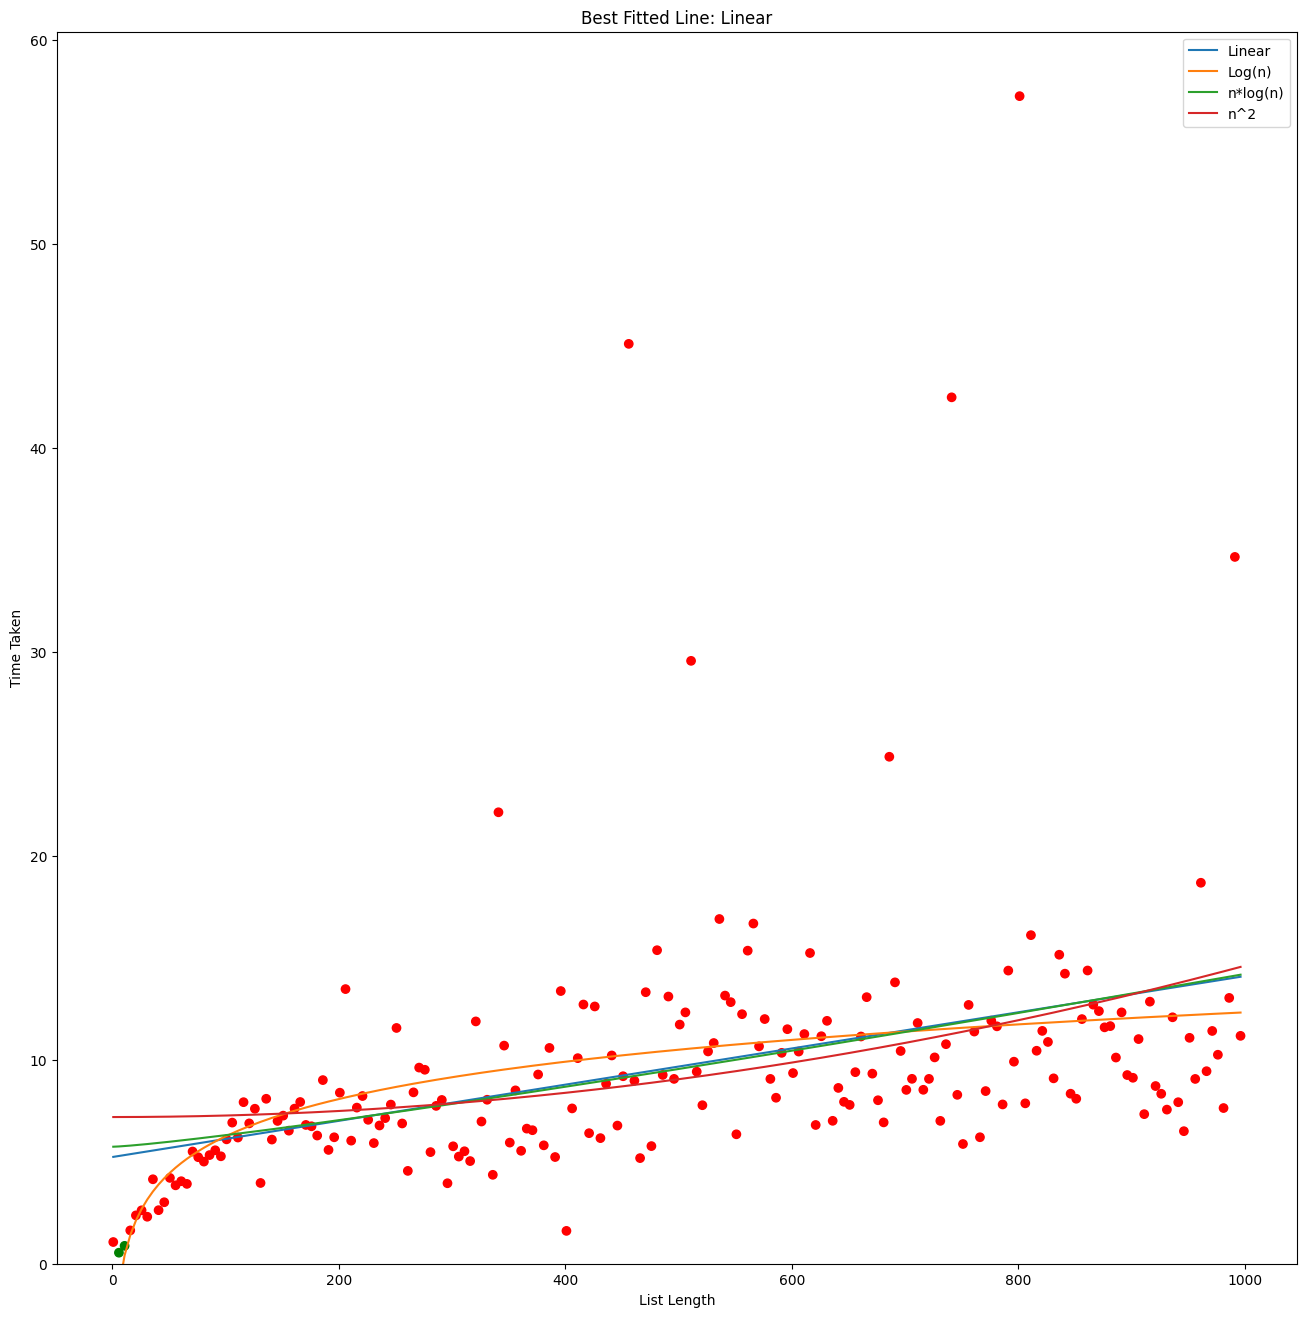

In [12]:
import numpy as np

import matplotlib.pyplot as plt

# Set the size of the chart
plt.figure(figsize=(16, 16))

# Extract the x and y values from all_points
x = [point[1] for point in all_points]
y = [point[0] for point in all_points]

# Fit a linear line
linear_coeffs = np.polyfit(x, y, 1)
linear_line = np.poly1d(linear_coeffs)

# Fit a log(n) line
log_coeffs = np.polyfit(np.log(x), y, 1)
log_line = np.poly1d(log_coeffs)

# Fit a n*log(n) line
nlog_coeffs = np.polyfit(x * np.log(x), y, 1)
nlog_line = np.poly1d(nlog_coeffs)

# Fit a n^2 line
n2_coeffs = np.polyfit(np.square(x), y, 1)
n2_line = np.poly1d(n2_coeffs)

# Plot the data points
plt.scatter(x, y, color=color)

# Plot the fitted lines
plt.plot(x, linear_line(x), label='Linear')
plt.plot(x, log_line(np.log(x)), label='Log(n)')
plt.plot(x, nlog_line(x * np.log(x)), label='n*log(n)')
plt.plot(x, n2_line(np.square(x)), label='n^2')

# Set the x-axis and y-axis labels
plt.xlabel('List Length')
# Set the y-axis label
plt.ylabel('Time Taken')

# Add a title for the best fitted line
best_fit_line = min([linear_line, log_line, nlog_line, n2_line], key=lambda line: np.pow(line(x) - y, 2).mean())
if best_fit_line == linear_line:
    plt.title('Best Fitted Line: Linear')
elif best_fit_line == log_line:
    plt.title('Best Fitted Line: Log(n)')
elif best_fit_line == nlog_line:
    plt.title('Best Fitted Line: n*log(n)')
else:
    plt.title('Best Fitted Line: n^2')

# Set the minimum y-axis value to 0
plt.ylim(bottom=0)
# Add a legend
plt.legend()

# Show the plot
plt.show()

In [9]:
correct_count = [point[2] for point in all_points].count(True)
print(f"{correct_count / len(all_points) * 100:.1f}% correct")

1.0% correct
